In [74]:
import os
import pandas as pd
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import seaborn as sns
import contextily as cx
import csv
import numpy as np

In [75]:
slc_shapefile_path = 'zcta_data/slc_zcta.shp'
slc_gdf = gpd.read_file(slc_shapefile_path)
slc_gdf.to_crs(epsg=4326, inplace=True)
slc_gdf.head()

,ZCTA5,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20,geometry
0,84070,84070,B5,G6350,S,19004717,0,+40.5771115,-111.8891029,"POLYGON ((-111.92159 40.57902, -111.92140 40.5..."
1,84108,84108,B5,G6350,S,187120680,381009,+40.8090403,-111.7275160,"POLYGON ((-111.84774 40.75849, -111.84726 40.7..."
2,84096,84096,B5,G6350,S,184045743,128519,+40.4870371,-112.0999829,"POLYGON ((-112.18765 40.51390, -112.18754 40.5..."
3,84129,84129,B5,G6350,S,17271536,0,+40.6535775,-111.9620632,"POLYGON ((-111.99152 40.63448, -111.99110 40.6..."
4,84084,84084,B5,G6350,S,17196254,0,+40.6213910,-111.9660607,"POLYGON ((-112.00622 40.62649, -112.00602 40.6..."


In [76]:
trax01_df = pd.read_csv('./data/transit_dfs/TRX01_df.csv', low_memory=False, header=1)
trax02_df = pd.read_csv('./data/transit_dfs/TRX02_df.csv', low_memory=False, header=1)
trax03_df = pd.read_csv('./data/transit_dfs/TRX03_df.csv', low_memory=False, header=1)
bus01_df = pd.read_csv('./data/transit_dfs/BUS01_df.csv', low_memory=False, header=1)
bus02_df = pd.read_csv('./data/transit_dfs/BUS02_df.csv', low_memory=False, header=1)
bus03_df = pd.read_csv('./data/transit_dfs/BUS03_df.csv', low_memory=False, header=1)
bus04_df = pd.read_csv('./data/transit_dfs/BUS04_df.csv', low_memory=False, header=1)
bus05_df = pd.read_csv('./data/transit_dfs/BUS05_df.csv', low_memory=False, header=1)
bus06_df = pd.read_csv('./data/transit_dfs/BUS06_df.csv', low_memory=False, header=1)
bus07_df = pd.read_csv('./data/transit_dfs/BUS07_df.csv', low_memory=False, header=1)

concat_list = [trax01_df, trax02_df, trax03_df, bus01_df, bus02_df, bus03_df, bus04_df, bus05_df, bus06_df, bus07_df]

transit_df = pd.concat(concat_list, ignore_index=True)
# transit_df = transit_df[transit_df['Date'] == '2021-08-06']
transit_df.head()

C:\Users\Raikou\AppData\Local\Temp\ipykernel_66796\509473521.py:14: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  transit_df = pd.concat(concat_list, ignore_index=True)


,Timestamp_UTC,Latitude_ddeg,Longitude_ddeg,Elevation_m,Battery_Voltage_volts,Train_Box_Temperature_degC,Train_Top_Relative_Humidity_%,Train_Top_Temperature_degC,ES642_PM2.5_Concentration_ug/m3,ES642_Air_Flow_Rate_L/min,...,GPS_Data_Flagged_binary,ES405_PM1_Concentration_ug/m3,ES405_PM2.5_Concentration_ug/m3,ES405_PM4_Concentration_ug/m3,ES405_PM10_Concentration_ug/m3,ES405_Air_Flow_Rate_L/min,ES405_Internal_Air_Temperature_degC,ES405_Internal_Relative_Humidity_%,ES405_Internal_Air_Pressure_hpa,ES405_Error_Code_code
0,2018-11-19 20:13:02,40.722687,-111.919289,1218.9,13.68,21.37,-9999.0,-9999.0,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2018-11-19 20:14:10,40.722786,-111.918907,1219.4,13.68,21.37,-9999.0,-9999.0,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2018-11-19 20:15:10,40.722919,-111.918556,1220.1,13.68,21.40,-9999.0,-9999.0,6.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2018-11-19 20:16:22,40.722958,-111.918671,1221.8,13.65,21.40,-9999.0,-9999.0,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2018-11-19 20:17:22,40.723015,-111.918709,1222.3,13.65,21.42,-9999.0,-9999.0,6.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [77]:
# Create a GeoSeries from the latitude and longitude data
transit_df['Point'] = gpd.GeoSeries([Point(xy) for xy in zip(transit_df['Longitude_ddeg'], transit_df['Latitude_ddeg'])])
transit_df.head(10)

,Timestamp_UTC,Latitude_ddeg,Longitude_ddeg,Elevation_m,Battery_Voltage_volts,Train_Box_Temperature_degC,Train_Top_Relative_Humidity_%,Train_Top_Temperature_degC,ES642_PM2.5_Concentration_ug/m3,ES642_Air_Flow_Rate_L/min,...,ES405_PM1_Concentration_ug/m3,ES405_PM2.5_Concentration_ug/m3,ES405_PM4_Concentration_ug/m3,ES405_PM10_Concentration_ug/m3,ES405_Air_Flow_Rate_L/min,ES405_Internal_Air_Temperature_degC,ES405_Internal_Relative_Humidity_%,ES405_Internal_Air_Pressure_hpa,ES405_Error_Code_code,Point
0,2018-11-19 20:13:02,40.722687,-111.919289,1218.9,13.68,21.37,-9999.0,-9999.0,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-111.91929 40.72269)
1,2018-11-19 20:14:10,40.722786,-111.918907,1219.4,13.68,21.37,-9999.0,-9999.0,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-111.91891 40.72279)
2,2018-11-19 20:15:10,40.722919,-111.918556,1220.1,13.68,21.40,-9999.0,-9999.0,6.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-111.91856 40.72292)
3,2018-11-19 20:16:22,40.722958,-111.918671,1221.8,13.65,21.40,-9999.0,-9999.0,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-111.91867 40.72296)
4,2018-11-19 20:17:22,40.723015,-111.918709,1222.3,13.65,21.42,-9999.0,-9999.0,6.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-111.91871 40.72301)
5,2018-11-19 20:18:22,40.722870,-111.918510,1223.6,13.65,21.45,-9999.0,-9999.0,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-111.91851 40.72287)
6,2018-11-19 20:19:34,40.722816,-111.918793,1226.2,13.65,21.45,-9999.0,-9999.0,5.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-111.91879 40.72282)
7,2018-11-19 20:20:46,40.722778,-111.918854,1227.2,13.65,21.48,-9999.0,-9999.0,6.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-111.91885 40.72278)
8,2018-11-19 20:21:46,40.723064,-111.918678,1227.3,13.64,21.51,-9999.0,-9999.0,7.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-111.91868 40.72306)
9,2018-11-19 20:22:58,40.723011,-111.918747,1227.9,13.64,21.53,-9999.0,-9999.0,6.0,2.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,POINT (-111.91875 40.72301)


In [78]:
transit_gdf = gpd.GeoDataFrame(transit_df, geometry='Point', crs='epsg:4326')
transit_gdf.head()
transit_slc_gdf = gpd.sjoin(transit_gdf, slc_gdf, how="left", predicate='within')


In [79]:
# transit_slc_gdf = transit_slc_gdf[transit_slc_gdf['Date'] == '2021-08-06']
transit_slc_gdf = transit_slc_gdf[transit_slc_gdf['Date'] == '2022-01-13']
transit_slc_gdf.head()

,Timestamp_UTC,Latitude_ddeg,Longitude_ddeg,Elevation_m,Battery_Voltage_volts,Train_Box_Temperature_degC,Train_Top_Relative_Humidity_%,Train_Top_Temperature_degC,ES642_PM2.5_Concentration_ug/m3,ES642_Air_Flow_Rate_L/min,...,index_right,ZCTA5,GEOID20,CLASSFP20,MTFCC20,FUNCSTAT20,ALAND20,AWATER20,INTPTLAT20,INTPTLON20
1164267,2022-01-13 00:00:06,40.760593,-111.883865,1294.8,13.82,12.02,47.41,6.83,23.0,2.0,...,25.0,84111.0,84111,B5,G6350,S,3523614.0,0.0,+40.7558119,-111.8842612
1164268,2022-01-13 00:01:06,40.760632,-111.877205,1304.7,13.82,12.00,47.34,6.80,26.0,2.0,...,25.0,84111.0,84111,B5,G6350,S,3523614.0,0.0,+40.7558119,-111.8842612
1164269,2022-01-13 00:02:06,40.760616,-111.873596,1308.2,13.82,12.00,48.15,6.73,25.0,2.0,...,19.0,84102.0,84102,B5,G6350,S,5002338.0,0.0,+40.7598902,-111.8636179
1164270,2022-01-13 00:03:06,40.760601,-111.872459,1308.2,13.82,12.00,48.19,6.87,25.0,2.0,...,19.0,84102.0,84102,B5,G6350,S,5002338.0,0.0,+40.7598902,-111.8636179
1164271,2022-01-13 00:04:06,40.760628,-111.869614,1315.5,13.82,11.98,48.32,6.93,25.0,2.0,...,19.0,84102.0,84102,B5,G6350,S,5002338.0,0.0,+40.7598902,-111.8636179


In [80]:
transit_avg_zcta = transit_slc_gdf.groupby('ZCTA5')['ES642_PM2.5_Concentration_ug/m3'].mean()
transit_avg_zcta = transit_avg_zcta.reset_index()
transit_avg_zcta['ZCTA5'] = transit_avg_zcta['ZCTA5'].astype(int)

transit_avg_zcta.head()


,ZCTA5,ES642_PM2.5_Concentration_ug/m3
0,84009,10.046243
1,84020,12.460094
2,84047,25.856707
3,84070,17.646667
4,84081,11.756098


In [81]:
slc_zcta_list_path = './zcta_data/slc_zcta.csv'

slc_zcta_list = []

with open(slc_zcta_list_path, newline='') as csvfile:
    reader = csv.reader(csvfile, delimiter=',')
    for row in reader:
        int_row = [int(i) for i in row]
        slc_zcta_list.append(int_row)
        
slc_zcta_list = [item for sublist in slc_zcta_list for item in sublist]

house_value_path = './data/census_data/median_house_value_df.csv'
house_value_df = pd.read_csv(house_value_path)
house_value_df = house_value_df[house_value_df['ZCTA5'].isin(slc_zcta_list)]
house_value_df.columns = house_value_df.columns.str.strip()
house_value_df = house_value_df.replace(',','', regex=True)
house_value_df = house_value_df.replace('-', np.nan)
house_value_df = house_value_df.rename(columns={'Median value (dollars)': 'Median_House_Value'})
house_value_df['Median_House_Value'] = house_value_df['Median_House_Value'].astype(float)
house_value_df = house_value_df.reset_index(drop=True)

house_value_df.head()

,ZCTA5,Median_House_Value
0,84006,274600.0
1,84009,424600.0
2,84020,569700.0
3,84044,252900.0
4,84047,297400.0


In [82]:
race_pop_path = './data/census_data/race_pop_by_latino_df.csv'
race_pop_df = pd.read_csv(race_pop_path)
race_pop_df = race_pop_df[race_pop_df['ZCTA5'].isin(slc_zcta_list)]
race_pop_df.columns = race_pop_df.columns.str.strip()
race_pop_df = race_pop_df.replace(',','', regex=True)
race_pop_df = race_pop_df.astype(int)
race_pop_df = race_pop_df.reset_index(drop=True)
race_pop_df['Perc_NonWhite'] = round(((race_pop_df['Total:'] - race_pop_df['White alone']) / race_pop_df['Total:'])*100, 1)

In [83]:
median_hh_income_path = './data/census_data/median_hh_income_df.csv'
median_hh_income_df = pd.read_csv(median_hh_income_path)
median_hh_income_df = median_hh_income_df[median_hh_income_df['ZCTA5'].isin(slc_zcta_list)]
median_hh_income_df.columns = median_hh_income_df.columns.str.strip()
median_hh_income_df = median_hh_income_df.replace(',','', regex=True)
median_hh_income_df = median_hh_income_df.replace('-', np.nan)
median_hh_income_df = median_hh_income_df.rename(columns={'Median household income in the past 12 months (in 2021 inflation-adjusted dollars)': 'Median_HH_Income'})
median_hh_income_df['Median_HH_Income'] = median_hh_income_df['Median_HH_Income'].astype(float)
median_hh_income_df = median_hh_income_df.reset_index(drop=True)

In [96]:
if isinstance(transit_avg_zcta, pd.Series):
    transit_avg_zcta = transit_avg_zcta.to_frame()

# # Merge transit_slc_gdf and transit_avg_zcta
# merged_df = transit_slc_gdf.merge(transit_avg_zcta, on='ZCTA5')

# Merge merged_df and house_value_df
transit_socioecon = transit_avg_zcta.merge(house_value_df, on='ZCTA5')
transit_socioecon = transit_socioecon.merge(median_hh_income_df, on='ZCTA5')
transit_socioecon = transit_socioecon.merge(race_pop_df, on='ZCTA5')

# transit_socioecon = transit_socioecon.dropna()
transit_socioecon.head(20)

,ZCTA5,ES642_PM2.5_Concentration_ug/m3,Median_House_Value,Median_HH_Income,Total:,Hispanic or Latino,Not Hispanic or Latino:,White alone,Black or African American alone,American Indian and Alaska Native alone,Asian alone,Native Hawaiian and Other Pacific Islander alone,Some Other Race alone,Population of two races:,Population of three races:,Population of four races:,Population of five races:,Population of six races:,Perc_NonWhite
0,84009,10.046243,424600.0,114664.0,38347,3994,34353,29916,376,75,1658,463,154,1589,121,0,1,0,22.0
1,84020,12.460094,569700.0,116977.0,51017,4728,46289,40534,654,270,2281,228,217,2007,94,4,0,0,20.5
2,84047,25.856707,297400.0,65501.0,37146,8507,28639,23287,979,293,1587,546,238,1606,93,10,0,0,37.3
3,84070,17.646667,330600.0,73670.0,30885,5734,25151,21241,403,204,1514,312,173,1224,75,4,1,0,31.2
4,84081,11.756098,371900.0,102651.0,51426,11584,39842,33952,724,239,1644,1111,219,1817,122,12,2,0,34.0
5,84088,19.379562,341300.0,84758.0,37856,8046,29810,25776,357,139,1238,667,170,1365,88,10,0,0,31.9
6,84101,27.238659,417700.0,50000.0,8140,1278,6862,5236,312,123,586,122,92,373,16,2,0,0,35.7
7,84102,23.483146,384000.0,46906.0,18857,1920,16937,13676,369,154,1616,111,118,853,34,6,0,0,27.5
8,84103,29.777778,580500.0,73911.0,22788,1966,20822,17971,360,88,974,145,148,1093,37,6,0,0,21.1
9,84104,36.996960,230700.0,53401.0,23487,11289,12198,7234,910,257,1228,1742,108,670,46,2,1,0,69.2


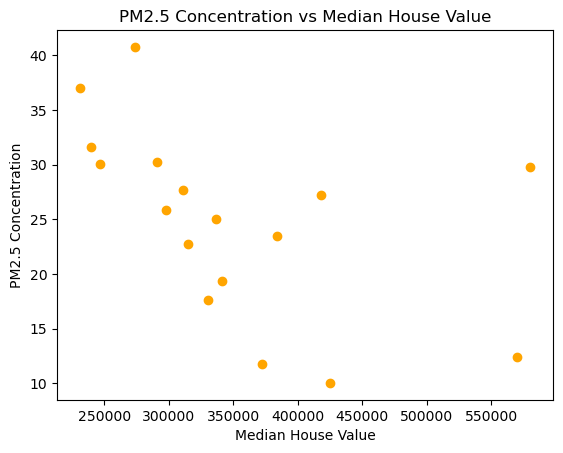

In [97]:
plt.scatter(transit_socioecon['Median_House_Value'], transit_socioecon['ES642_PM2.5_Concentration_ug/m3'], color='orange')
plt.xlabel('Median House Value')
plt.ylabel('PM2.5 Concentration (ug/m3)')
plt.title('PM2.5 Concentration vs Median House Value ($)')

plt.show()

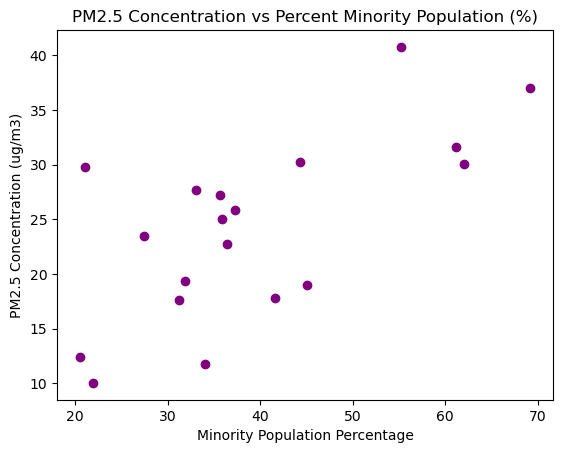

In [101]:
plt.scatter(transit_socioecon['Perc_NonWhite'], transit_socioecon['ES642_PM2.5_Concentration_ug/m3'], color='purple')
plt.xlabel('Minority Population Percentage')
plt.ylabel('PM2.5 Concentration (ug/m3)')
plt.title('PM2.5 Concentration vs Percent Minority Population (%)')
plt.show()

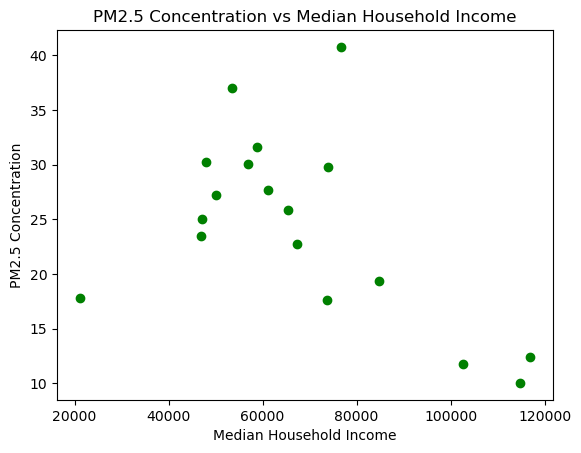

In [100]:
plt.scatter(transit_socioecon['Median_HH_Income'], transit_socioecon['ES642_PM2.5_Concentration_ug/m3'], color='green')

plt.xlabel('Median Household Income')
plt.ylabel('PM2.5 Concentration (ug/m3)')
plt.title('PM2.5 Concentration vs Median Household Income ($)')
plt.show()